<a href="https://colab.research.google.com/github/Aatiqa-bano/Internship-Projects/blob/main/Spam_Email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [56]:
data = pd.read_csv('emails.csv')

In [57]:
# Assuming 'Email No.' is an index and should be dropped
if 'Email No.' in data.columns:
    data.drop(columns=['Email No.'], inplace=True)

# Check for missing values
if data.isnull().sum().sum() > 0:
    data.fillna(data.mean(), inplace=True)  # Filling missing values with the mean of each column

# Separate features and target variable
if 'Prediction' not in data.columns:
    raise ValueError("'Prediction' column is missing from the dataset")

X = data.drop(columns=['Prediction'])
y = data['Prediction']

# Convert the features to numeric if they are not
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Handle any remaining missing values in features
X.fillna(X.mean(), inplace=True)

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [51]:
svm_model = SVC(kernel='linear')  # You can change the kernel as needed ('linear', 'poly', 'rbf', 'sigmoid')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
y_pred = svm_model.predict(X_test)


SVM Model Performance:
Accuracy: 0.9449275362318841
Precision: 0.9288287038694205
Recall: 0.9381445891087299
F1-Score: 0.9333089155449744

Confusion Matrix:
[[705  34]
 [ 23 273]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       739
           1       0.89      0.92      0.91       296

    accuracy                           0.94      1035
   macro avg       0.93      0.94      0.93      1035
weighted avg       0.95      0.94      0.95      1035



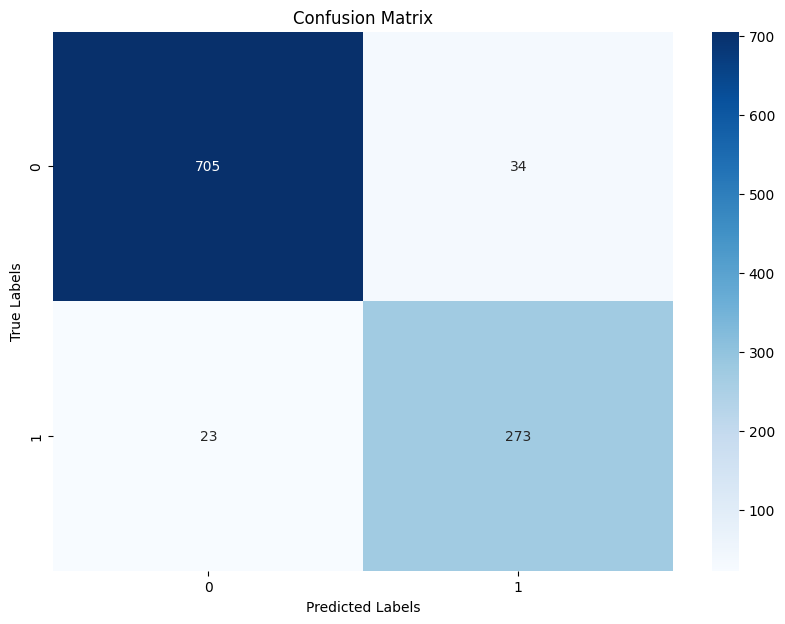

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("SVM Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

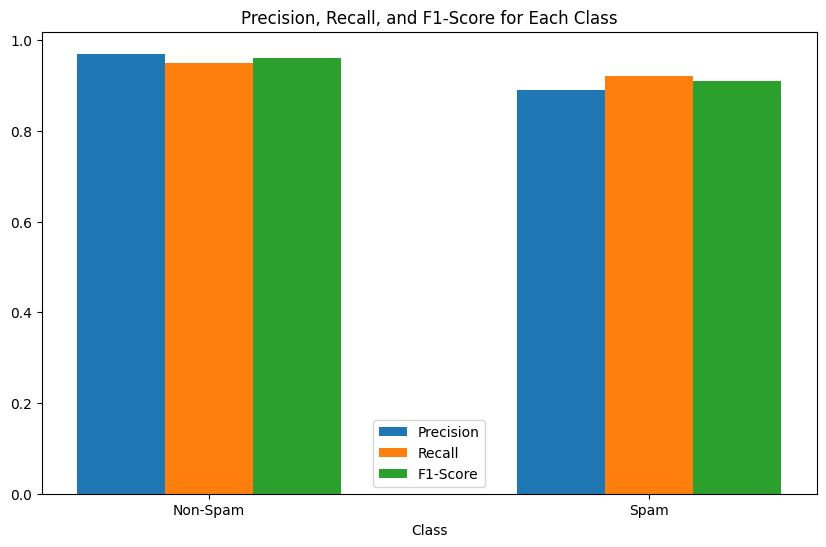

In [55]:
import matplotlib.pyplot as plt

# Define the metrics for each class
metrics = {
    'Non-Spam': {'Precision': 0.97, 'Recall': 0.95, 'F1-Score': 0.96},
    'Spam': {'Precision': 0.89, 'Recall': 0.92, 'F1-Score': 0.91}
}

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
classes = list(metrics.keys())
metrics_names = list(next(iter(metrics.values())).keys())

for i, metric in enumerate(metrics_names):
    values = [metrics[cls][metric] for cls in classes]
    ax.bar(np.arange(len(classes)) + i * 0.2, values, width=0.2, label=metric)

ax.set_xticks(np.arange(len(classes)) + 0.2)
ax.set_xticklabels(classes)
ax.set_xlabel('Class')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.legend()
plt.show()
